In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('prices.csv')

In [4]:
df.head()

,date,price_supplier_a_dollars_per_item,price_supplier_b_dollars_per_item
0,1/02/2016,104,76
1,1/03/2016,108,76
2,1/04/2016,101,84
3,1/05/2016,104,79
4,1/06/2016,102,81


In [5]:
# Create the variables to store the prices from suppler A and Supplier B

prices_A = df['price_supplier_a_dollars_per_item']
prices_B = df['price_supplier_b_dollars_per_item']

In [7]:
prices_A.head()

0    104
1    108
2    101
3    104
4    102
Name: price_supplier_a_dollars_per_item, dtype: int64

In [8]:
prices_B.head()

0    76
1    76
2    84
3    79
4    81
Name: price_supplier_b_dollars_per_item, dtype: int64

In [9]:
# Step 1: Define the combined Price Function:

def f_of_omega(omega, pA, pB):
    return omega * pA + (1 - omega) * pB

In [ ]:
# Step 2: Get the variance of the combined price:

def L_of_omega(omega, pA, pB):
    f = f_of_omega(omega, pA, pB)
    return np.var(f)

In [ ]:
# Step 3: Find the optimal w:

N = 1001

omega_array = np.linspace(0, 1, N, endpoint=True)

L_array = [L_of_omega(omega, prices_A, prices_B) for omega in omega_array] # Computes the variance for each omega in the omega array and stores it in the list L_array

# Find the optimal omega:
optimal_omega = omega_array[np.argmin(L_array)] # np.argmin returns the index of the smallest value in L_array, the index corresponds to the position  of the optimal omega in omega_array
min_variance = np.min(L_array) # returns the minimum value in L_array which is the minimum value of the combined price (f_of_omega)


# Display results
print(f"Optimal Omega: {optimal_omega}")
print(f"Min Variance: {min_variance}")

Optimal Omega: 0.7020000000000001
Min Variance: 9.24971888


In [12]:
import matplotlib.pyplot as plt

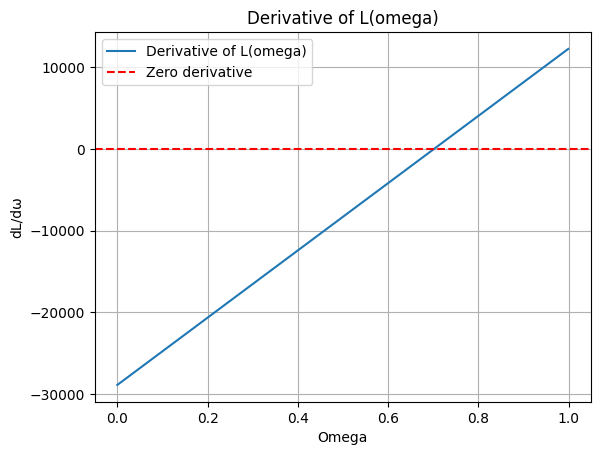

In [15]:
L_array = np.array(L_array)
delta_omega = 1e-5
derivative = (L_array[1:] - L_array[:-1]) / delta_omega

# Plot the derivative
plt.plot(omega_array[:-1], derivative, label='Derivative of L(omega)')
plt.axhline(0, color='red', linestyle='--', label='Zero derivative')
plt.xlabel('Omega')
plt.ylabel('dL/dω')
plt.title('Derivative of L(omega)')
plt.legend()
plt.grid(True)
plt.show()